# Imort main libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for photing and viewing data
import matplotlib.pyplot as plt# plotting library

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazonstockprice/AMZN_Stock_Updated_V2.csv
/kaggle/input/amazonstockprice/Amazon.csv
/kaggle/input/amazon/Test Macine Learning Enginer Inosoft_AMZN.csv


# Load Dataset

In [3]:
df=pd.read_csv('/kaggle/input/amazon/Test Macine Learning Enginer Inosoft_AMZN.csv')

# Dataset Check

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


# Set Proper DateTime

In [5]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [6]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


# Now Data Visualization Plots

Text(0.5, 1.0, 'Anazon Stock at all time')

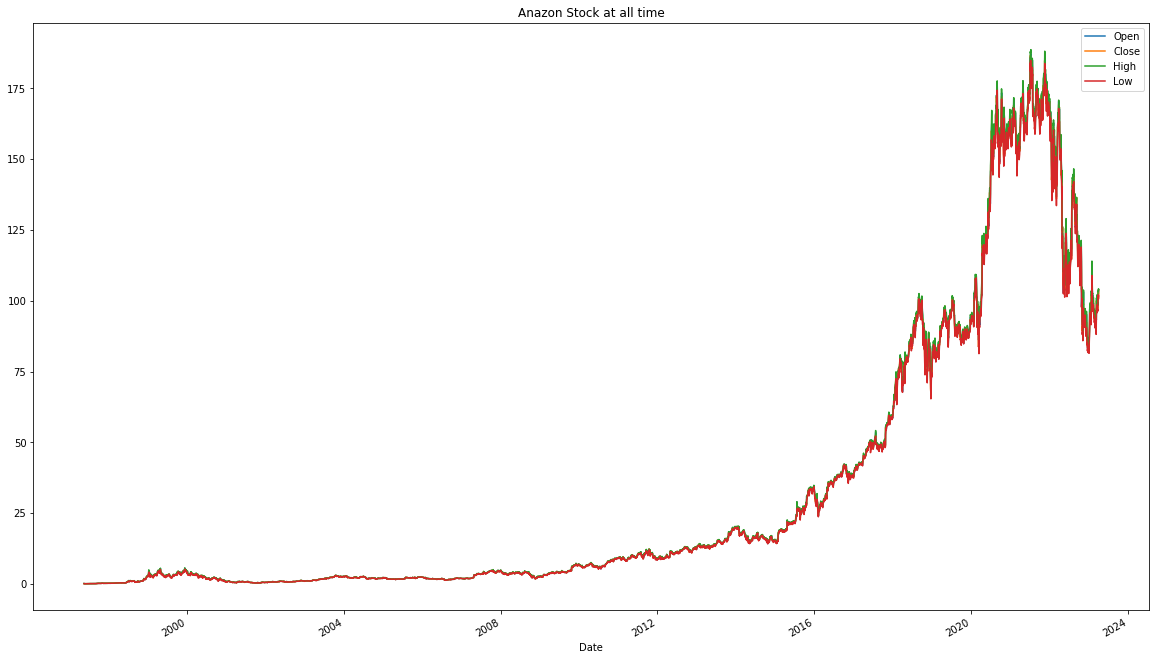

In [8]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Anazon Stock at all time')

Text(0, 0.5, 'Stock action')

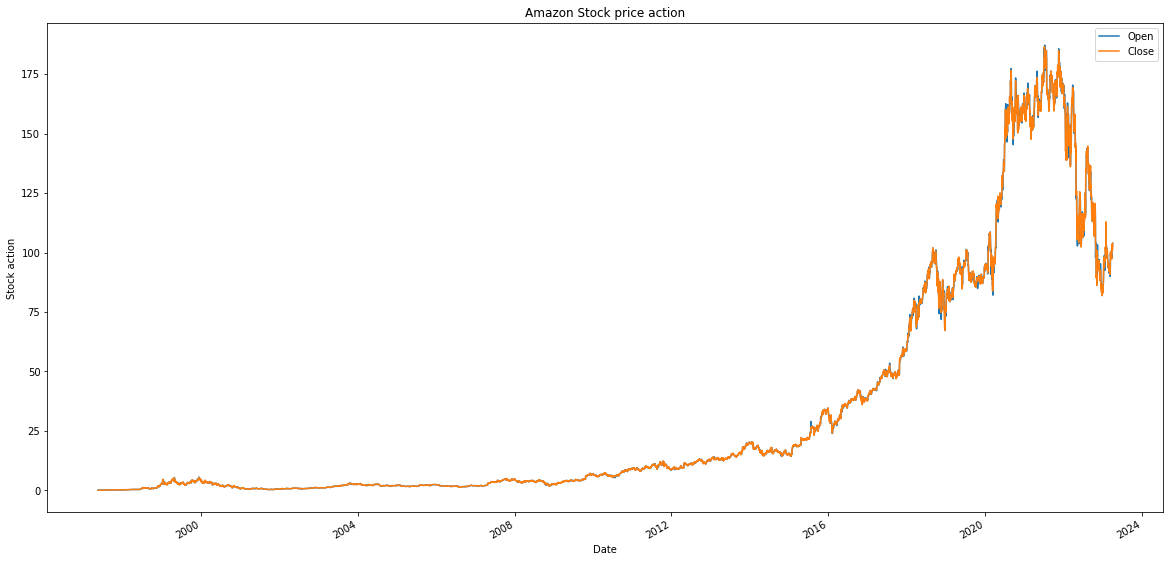

In [9]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

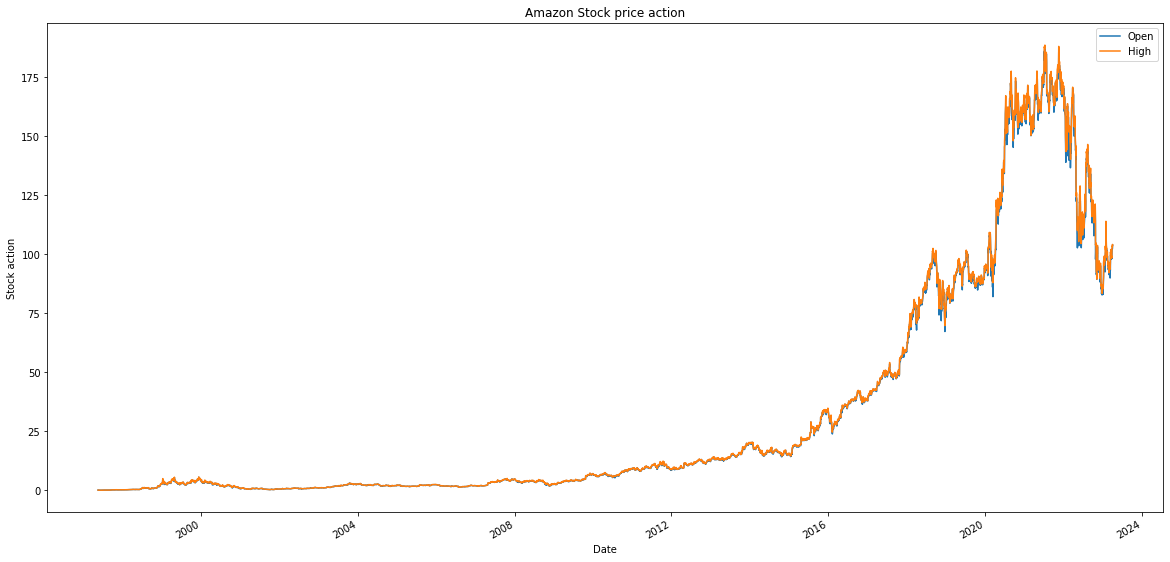

In [10]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

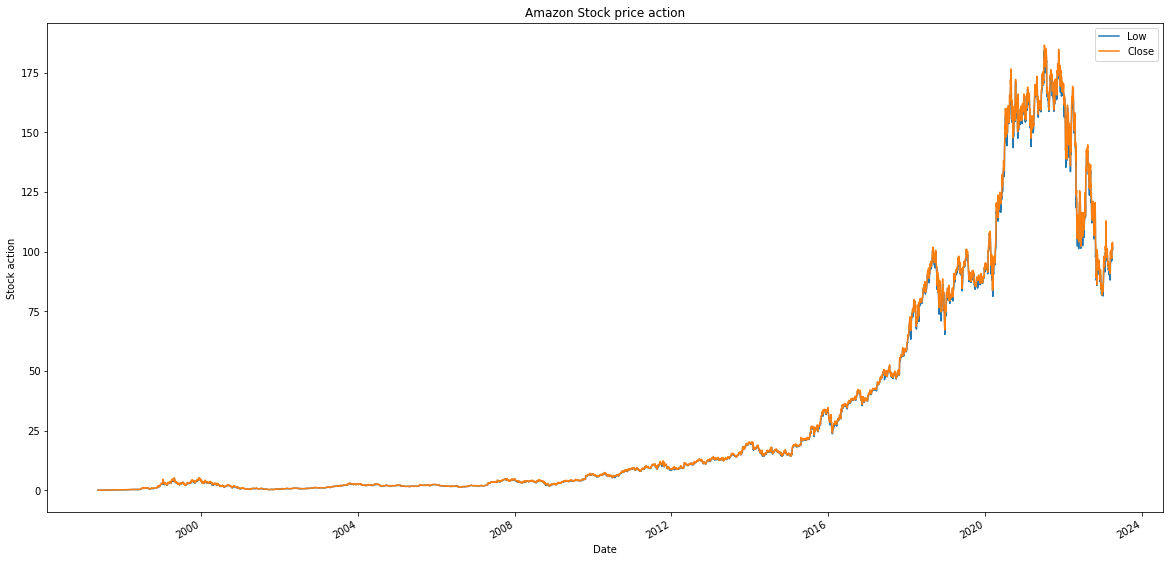

In [11]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

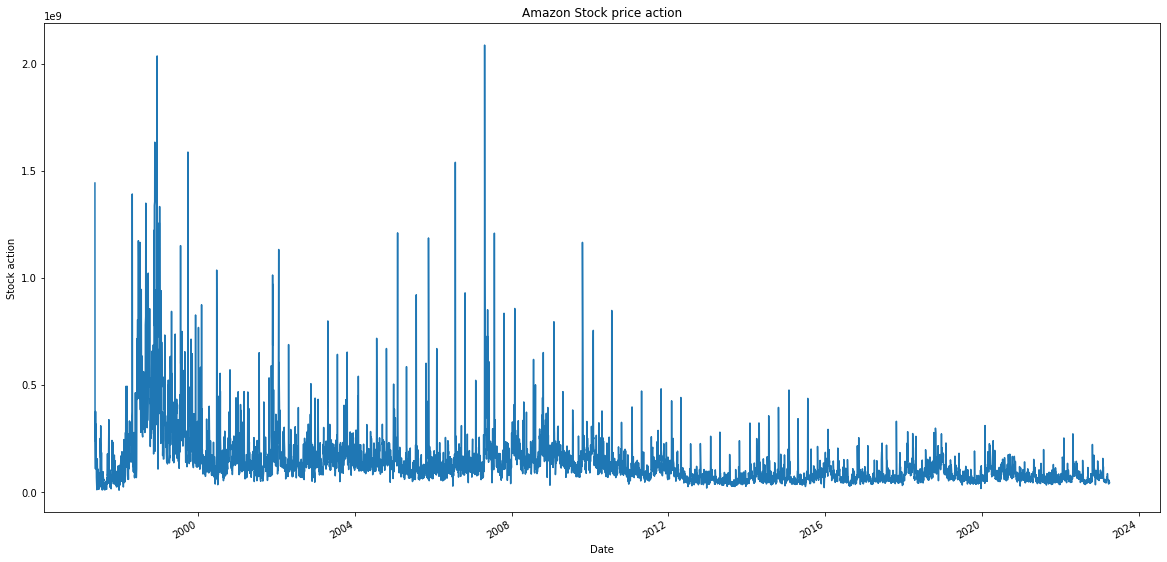

In [12]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

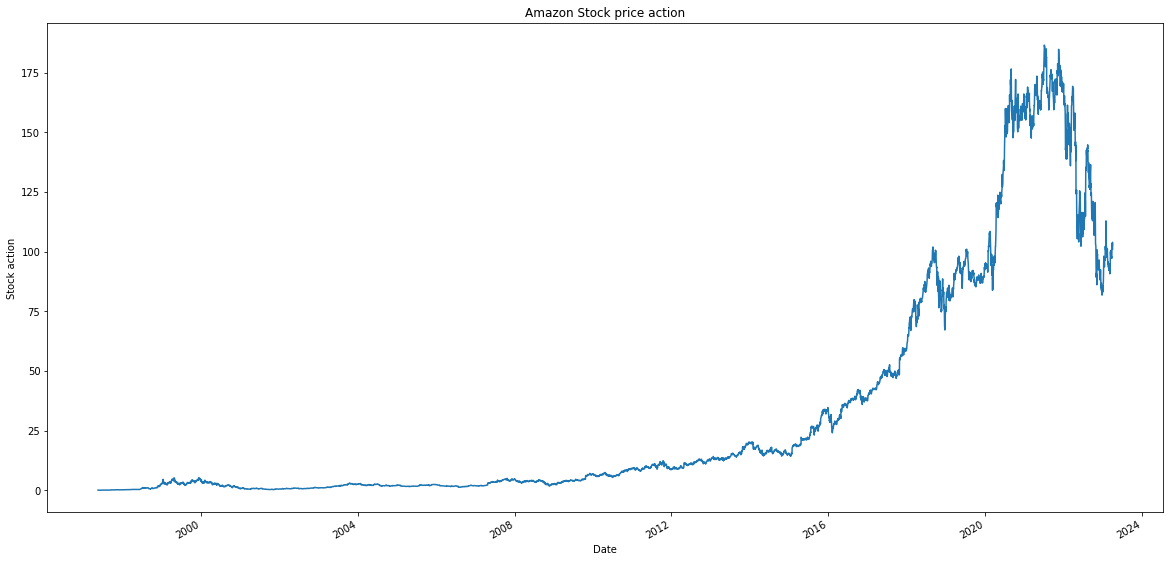

In [13]:
df['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

# From the previous analysis and visualization, it can take data from 2000 as the previous years doesn't important, not have a stock price variance

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

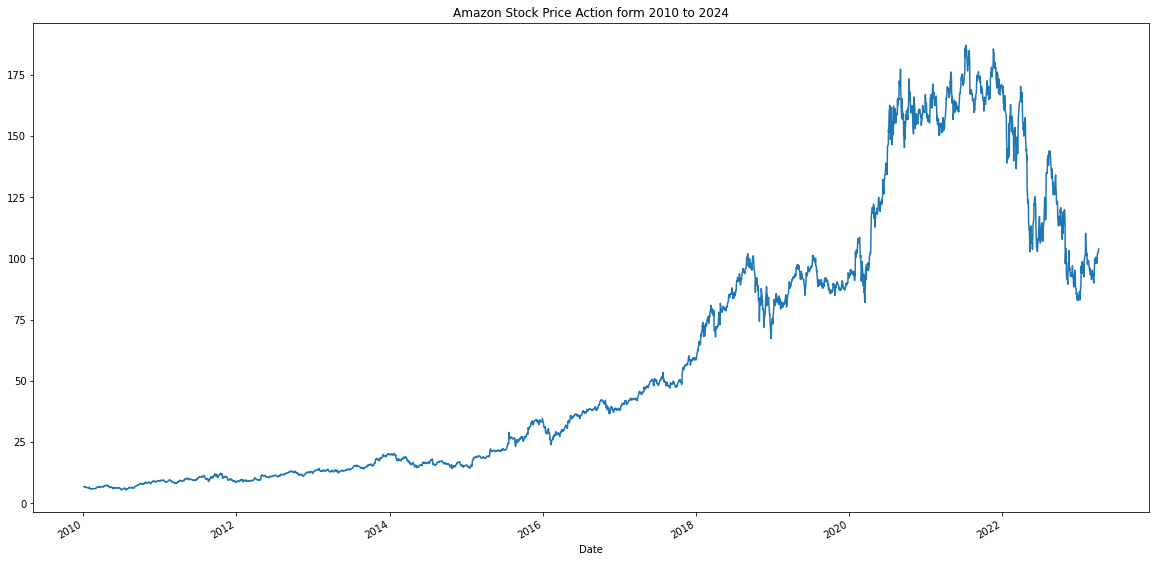

In [14]:
Ama = df['2010':'2024']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

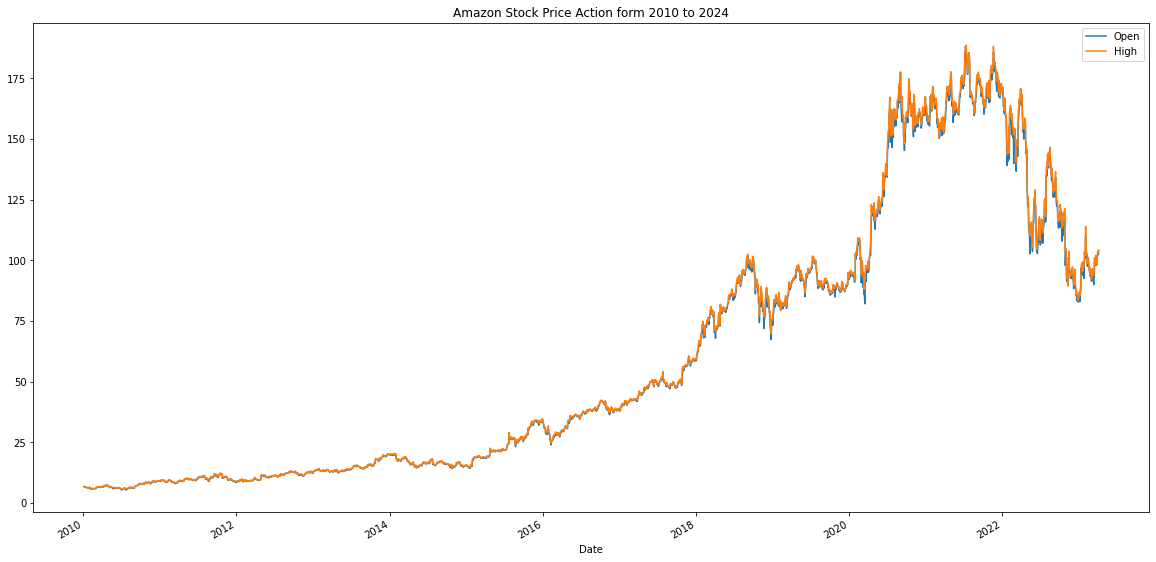

In [15]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

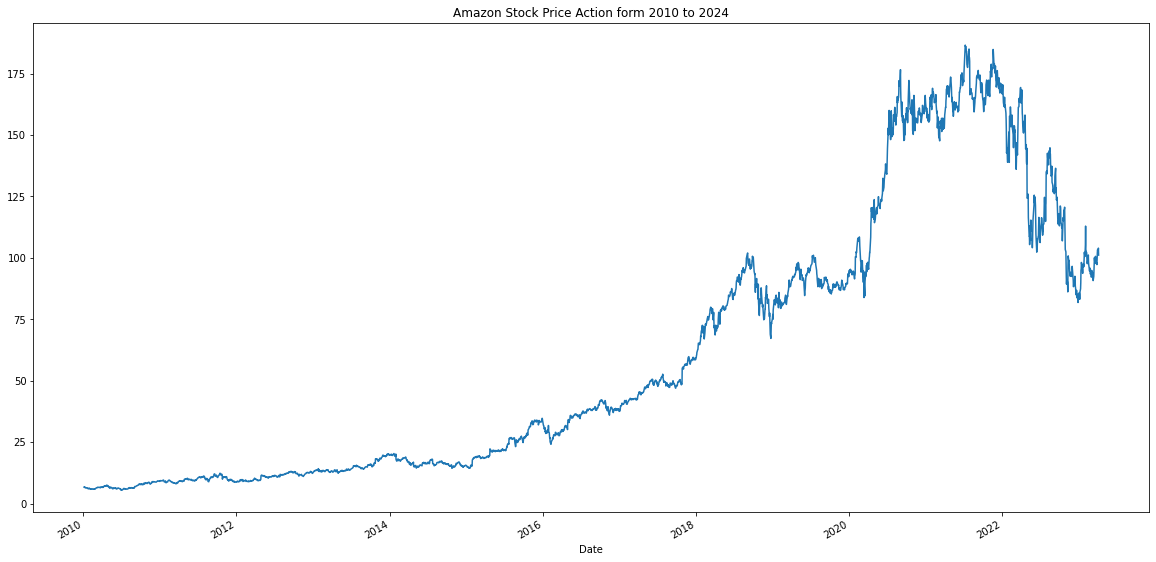

In [16]:
Ama['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

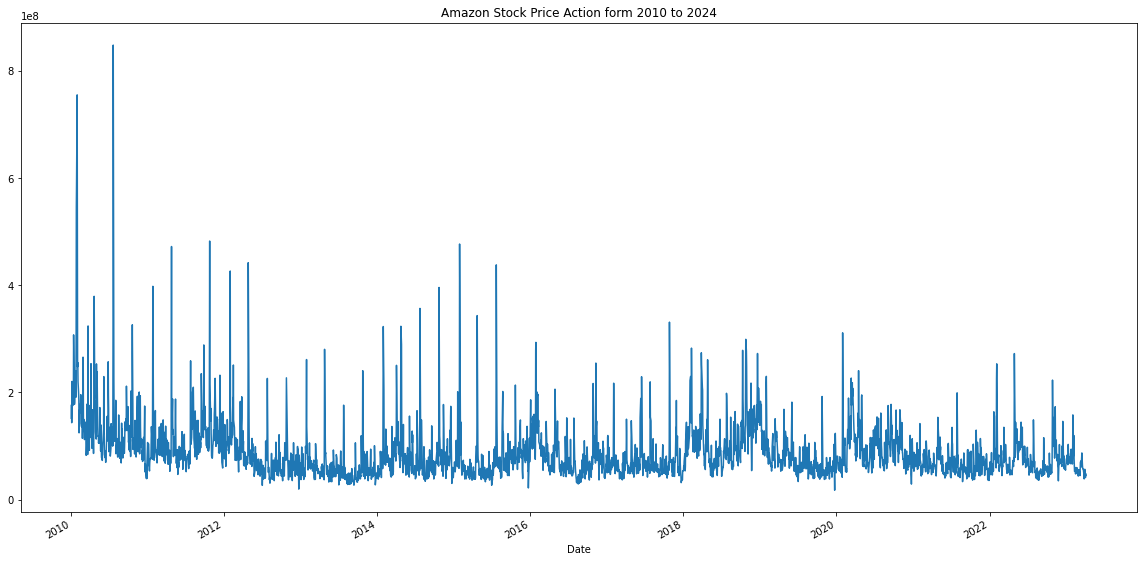

In [17]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

In [18]:
Ama.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3.337000e+03
mean,59.677107,60.369446,58.909821,59.652615,59.652615,8.792155e+07
std,53.858133,54.508295,53.131603,53.810447,53.810447,5.273262e+07
min,5.296500,5.564500,5.290000,5.430500,5.430500,1.762600e+07
25%,13.465500,13.583000,13.280500,13.445000,13.445000,5.598400e+07
50%,37.919498,38.170502,37.612499,37.862499,37.862499,7.423200e+07
75%,94.146004,95.184502,93.070000,94.187500,94.187500,1.030580e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,8.484220e+08


# Augmented Dickey Fuller Test (ADF)

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [20]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                   -0.398322
p-value                           0.910379
#Lags Used                       31.000000
Number of Observations Used    6484.000000
Critical Value (1%)              -3.431359
Critical Value (5%)              -2.861986
Critical Value (10%)             -2.567007
dtype: float64
None


In [21]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -1.179125
p-value                          0.682511
#Lags Used                      14.000000
Number of Observations Used    297.000000
Critical Value (1%)             -3.452561
Critical Value (5%)             -2.871321
Critical Value (10%)            -2.571982
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -4.439163
p-value                          0.000253
#Lags Used                       4.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64
None


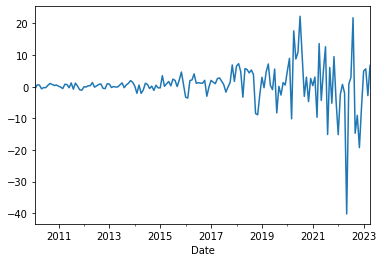

In [22]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()


print(adf_test(Ama_open_diff))

# Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)
another test for checking the stationarity of a time series

In [23]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [24]:
kpss_test(Ama['High'])

Results of KPSS Test:
Test Statistic            7.660526
p-value                   0.010000
Lags Used                37.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

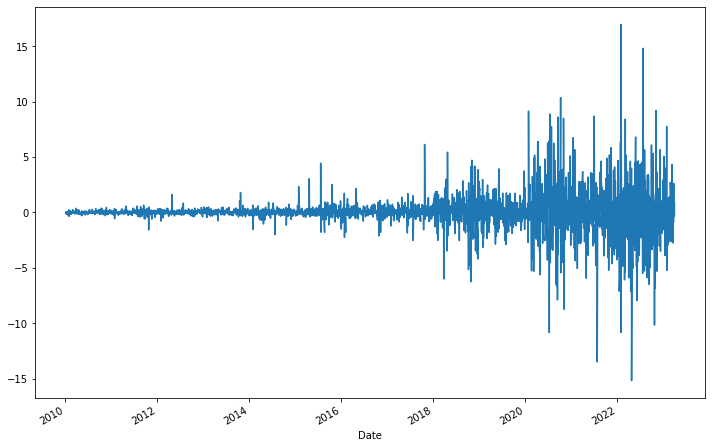

In [25]:
Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)
Ama["High_diff"].dropna().plot(figsize=(12, 8))

In [26]:
kpss_test(Ama['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.112026
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [27]:
kpss_test(Ama['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.12867
p-value                  0.10000
Lags Used                5.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [28]:
kpss_test(Ama['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           1.477957
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [29]:
adf_test(Ama['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.195954e+01
p-value                        4.133306e-22
#Lags Used                     2.700000e+01
Number of Observations Used    3.308000e+03
Critical Value (1%)           -3.432328e+00
Critical Value (5%)           -2.862414e+00
Critical Value (10%)          -2.567235e+00
dtype: float64


# Data Preprocessing

In [30]:
train_Ama = Ama['High'].iloc[:-4]

# Take ramdom  6 variables 

X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

In [31]:
import math
train_len = math.ceil(len(train_Ama)*0.8)
train_len

2667

# For Model and apply RNN + LSTM

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Ama['Close'].values.reshape(-1,1))

In [34]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM Model

In [35]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))



model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


# Fit the model

In [36]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
105/105 - 3s - loss: 1268.6453
Epoch 2/10
105/105 - 1s - loss: 4.4763
Epoch 3/10
105/105 - 1s - loss: 4.2490
Epoch 4/10
105/105 - 1s - loss: 4.2284
Epoch 5/10
105/105 - 1s - loss: 4.2156
Epoch 6/10
105/105 - 1s - loss: 4.3601
Epoch 7/10
105/105 - 1s - loss: 3.9118
Epoch 8/10
105/105 - 1s - loss: 3.8824
Epoch 9/10
105/105 - 1s - loss: 3.8281
Epoch 10/10
105/105 - 1s - loss: 3.8980


<AxesSubplot:>

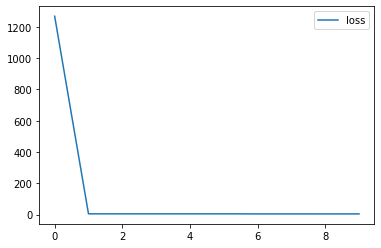

In [37]:
# Plotting the training loss
losses = pd.DataFrame(model.history.history)
losses[['loss']].plot()

In [38]:
test_data = train_Ama[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [39]:
# Preparing the test data
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
prediction = model.predict(X_val)

# Making predictions

In [40]:
lstm_valid_pred = model.predict(X_val)

# Calculating RMSE

In [41]:
print('Validation RMSE:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Validation RMSE: 3.5355228007401776


In [42]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 1.8722347314834995
Validation rmse: 3.5355228007401776


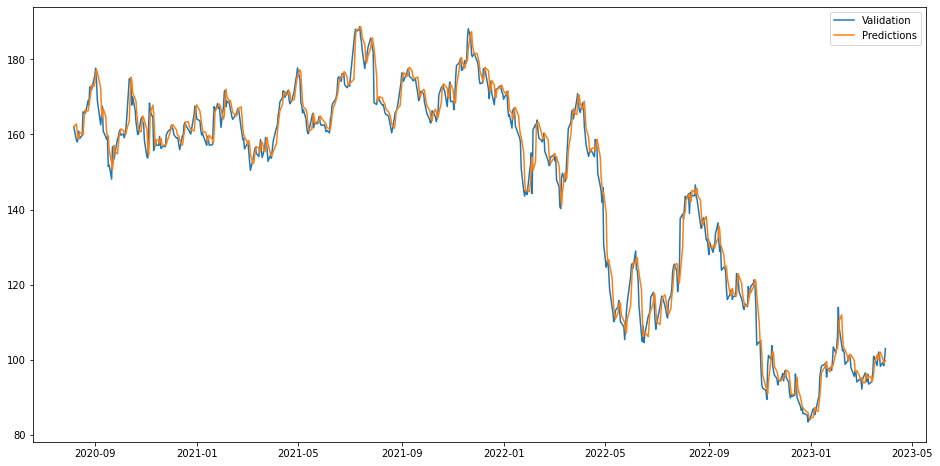

In [43]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

# data frame to see the percentage of error between real and predicted

In [44]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,666.000000
mean,-0.654808
std,3.476967
min,-14.469360
25%,-2.576367
50%,-0.754692
75%,1.458632
max,14.772476


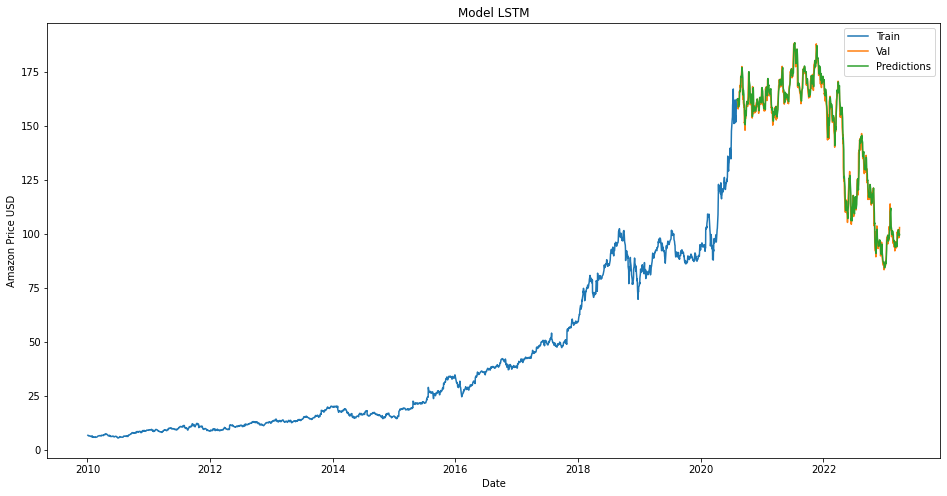

In [45]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()